In [1]:
# 1. Importar librerías y módulos
import sys
import os
sys.path.append("../src")

import train
import yaml
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from utils import plot_training
from utils import get_training_data_path

2025-07-04 20:25:00.587408: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# 2. Cargar configuración
config = train.load_config()

In [5]:
# 3. Entrenar modelo directamente con la función modular
history = train.train(return_history=True)

✅ Usando class_weight: {0: np.float64(0.5008642347502763), 1: np.float64(289.7732558139535)}
🛑 EarlyStopping ACTIVADO (patience = 5)
Epoch 1/50
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8916 - loss: 0.6546 - val_accuracy: 0.9753 - val_loss: 0.1305
Epoch 2/50
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9512 - loss: 0.1947 - val_accuracy: 0.9673 - val_loss: 0.1429
Epoch 3/50
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9560 - loss: 0.1679 - val_accuracy: 0.9761 - val_loss: 0.0892
Epoch 4/50
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9669 - loss: 0.1669 - val_accuracy: 0.9811 - val_loss: 0.0897
Epoch 5/50
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9691 - loss: 0.1361 - val_accuracy: 0.9786 - val_loss: 0.0786
Epoch 6/50
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9748 - loss: 0.1331 - val_accuracy: 0.9839 - val_loss: 0.0772
Epoch 7/50
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9739 - loss: 0.1175

In [6]:
# 4. Imprimir numero de muestras
train_path = get_training_data_path(config)
X_train, y_train = train.load_data(train_path, config["base_dir"])
X_val, y_val = train.load_data(config["paths"]["val"], config["base_dir"])
X_test, y_test = train.load_data(config["paths"]["test"], config["base_dir"])

print(f"Training set:     {len(X_train)} muestras")
print(f"Validation set:  {len(X_val)} muestras")
print(f"Test set:        {len(X_test)} muestras")

Training set:     199364 muestras
Validation set:  42721 muestras
Test set:        42722 muestras


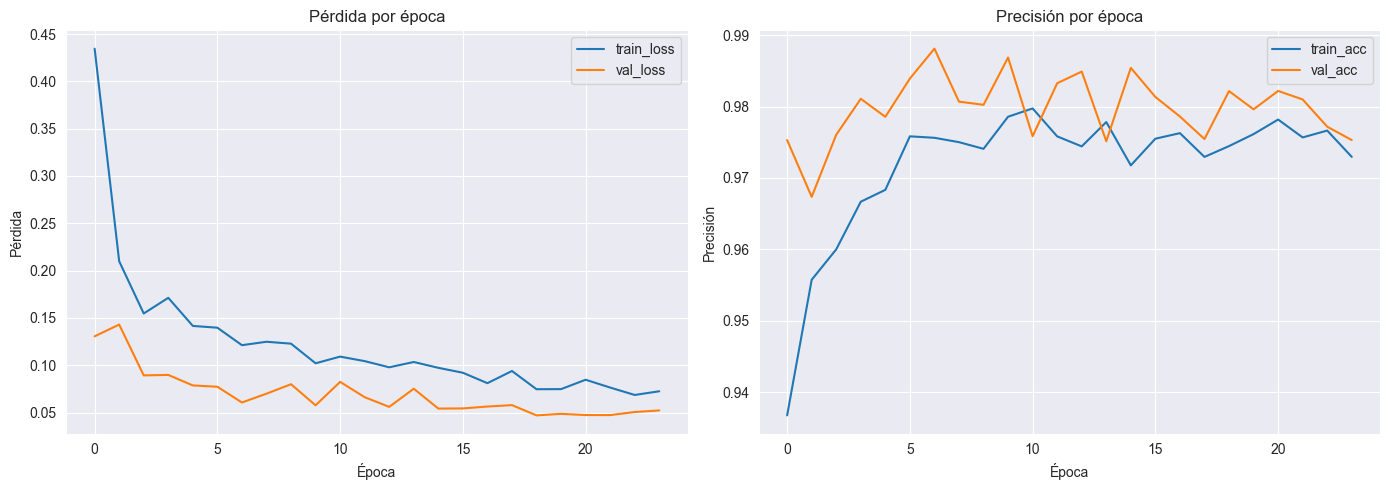

In [7]:
# 5. Visualizar curvas
plot_training(history)